## CMPS-3240-01: Introduction to Machine Learning
## Homework Assignment 2 for Alex Olteanu

### Setup

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Download the data

In [ ]:
import pandas as pd
import urllib.request

URL = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
LOCAL_PATH = "BostonHousing.csv"

def fetch_boston_housing_data(housing_url=URL, housing_path=LOCAL_PATH):
    urllib.request.urlretrieve(housing_url, housing_path)

fetch_boston_housing_data()

boston_housing = pd.read_csv(LOCAL_PATH)

### Overview of the data

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10000

- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
# Display the first five rows of the Boston Housing dataset.
boston_housing.head()

# Observation:
# Initial rows show varied data across features.
# Towns differ in crime rates, tax rates, and median home values.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# Display housing info.
boston_housing.info()

# Observation:
# The dataset has 506 entries with 14 columns.
# No missing values
# Columns are of float and integer data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
# Describe housing info.
boston_housing.describe()

# Observation: Features have varied scales.
# Average crime rate is 3.6 and average tax rate is 408.23.
# Some features have wide spreads and are noticeable from the standard deviations.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


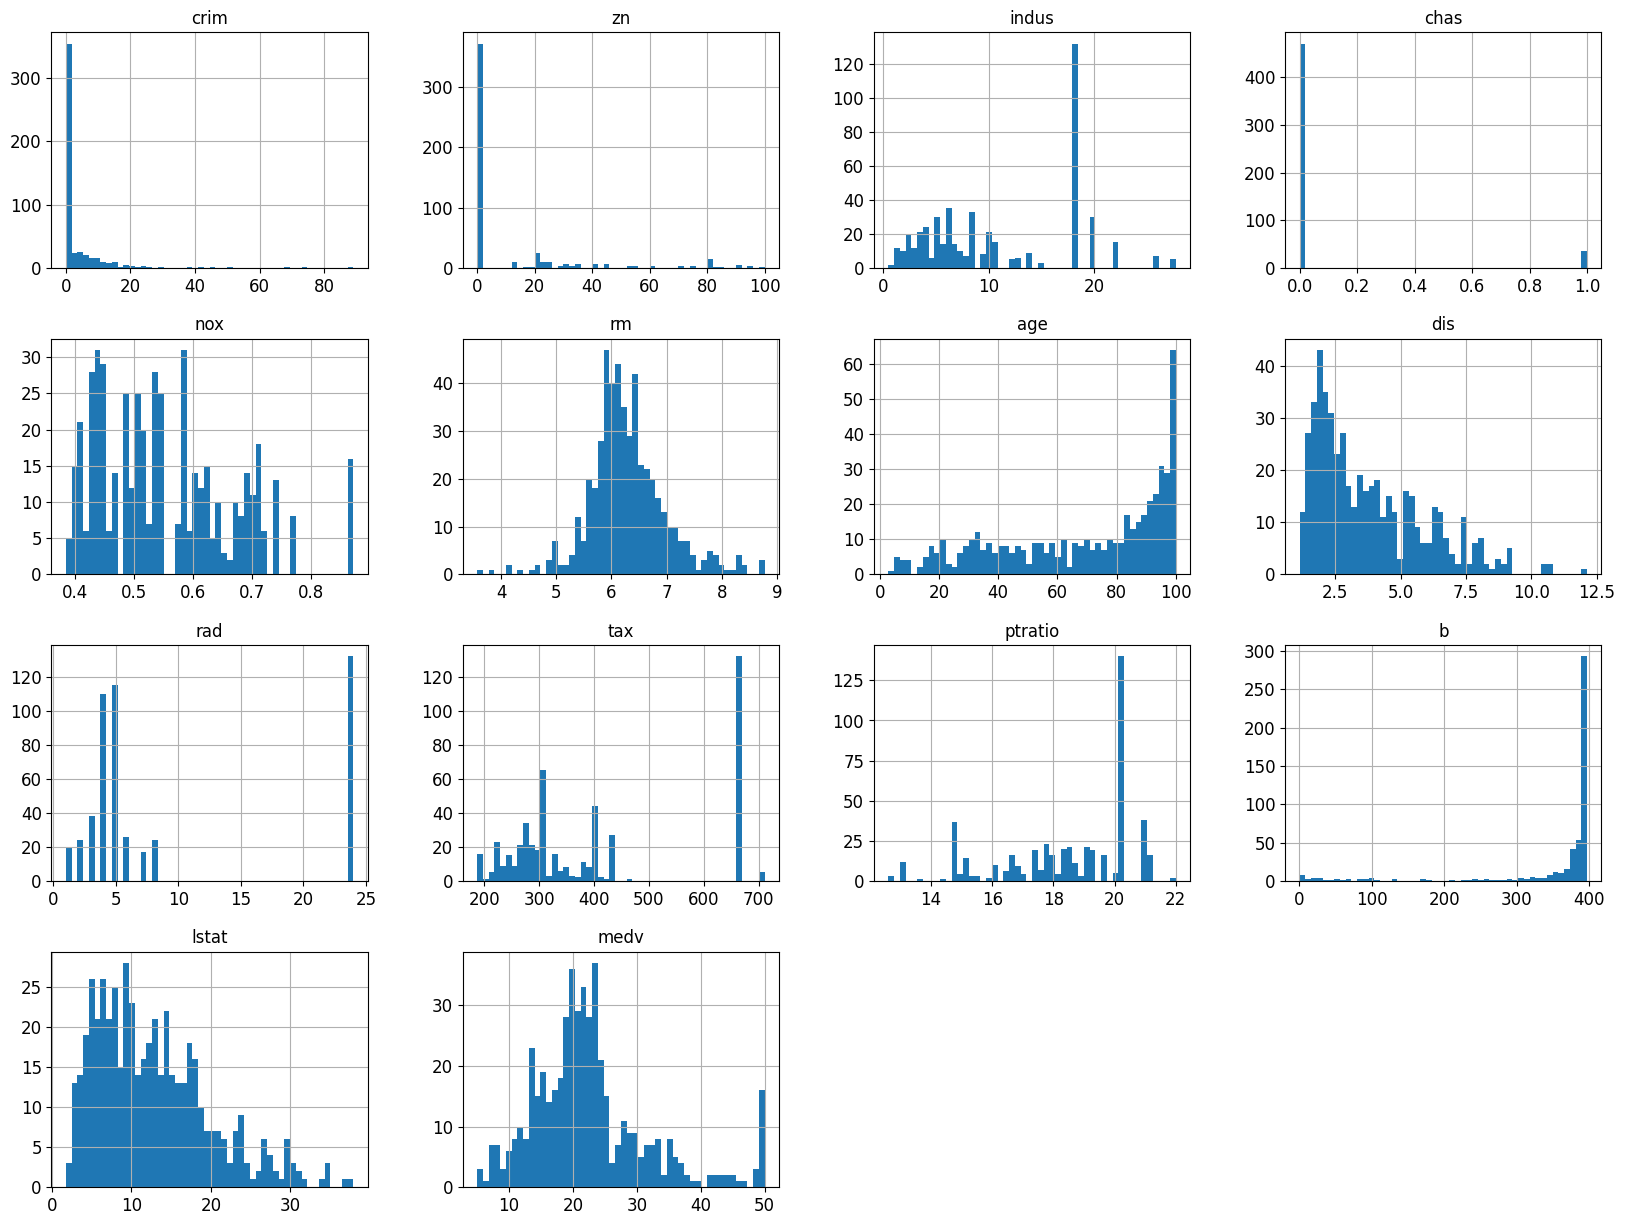

In [ ]:
# Plot historgrams of all columns.
boston_housing.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# Generate correlations between all features and 'medv'.
corr_matrix = boston_housing.corr()
corr_matrix["medv"].sort_values(ascending=False)

# Observation:
# 'rm' the highest positive correlation with median home value,
# 'lstat' has the highest negative correlation.

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

### Ski-kit Learn

In [ ]:
# Import necessary modules.
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
# Create a pipeline for preprocessing the data.
num_pipeline = Pipeline([
    #('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [ ]:
# Separate the features from the target column
housing_features = boston_housing.drop("medv", axis=1) # Drop the target column
housing_labels = boston_housing["medv"].copy()

In [ ]:
# Apply the pipeline transformations to the features.
housing_prepared = num_pipeline.fit_transform(housing_features)

In [ ]:
# Convert the processed data to a DataFrame.
housing_prepared_df = pd.DataFrame(housing_prepared, columns=housing_features.columns)

In [ ]:
# Display housing_prepared_df.
housing_prepared_df

# Observation:
# Data has been standardized with a mean of 0 and standard deviation of 1.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [ ]:
# Display housing_labels.
housing_labels

# Observation:
# 'housing_labels' contains the target house prices for the dataset.

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [ ]:
# Split the processed data into training and test sets (80% training, 20% testing).
X_train, X_test, y_train, y_test = train_test_split(housing_prepared_df, housing_labels, test_size=0.2, random_state=0)

In [ ]:
# Initialize the model.
lin_reg = LinearRegression()

# Fit the model to the training data.
lin_reg.fit(X_train, y_train)

# Predictions.
train_preds = lin_reg.predict(X_train)
test_preds = lin_reg.predict(X_test)

In [ ]:
# Calculate the Mean Absolute Error (MAE) for training and test data.
train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)

print(f"Training MAE: {train_mae}")
print(f"Test MAE: {test_mae}")

Training MAE: 3.1031563965794344
Test MAE: 3.842909220444496


In [ ]:
# Calculate the Mean Squared Error (MSE) for training and test data.
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Training MSE: 19.32647020358573
Test MSE: 33.44897999767652


In [ ]:
# Calculate the Root Mean Squared Error (RMSE) for training and test data.
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f"Training RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Training RMSE: 4.396188144698282
Test RMSE: 5.783509315085134


In [ ]:
# Cross validation scores.
lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=5)

# Convert negative MSE scores to RMSE.
lin_rmse_scores = np.sqrt(-lin_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [4.01835181 4.59619826 4.50419069 5.62626391 4.08417755]
Mean: 4.5658364433145
Standard deviation: 0.5763615451059967
